In [1]:
import pandas as pd
from prince import MCA
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the Titanic dataset
titanic_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(titanic_url)

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# Select relevant categorical columns for MCA
categorical_cols = ["Pclass", "Sex",  "Survived"]

# Drop missing values in selected columns
titanic_mca = titanic[categorical_cols].dropna()

In [7]:
# Convert categorical variables to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
titanic_mca_encoded = titanic_mca.apply(label_encoder.fit_transform)

In [15]:
# Perform MCA
mca = MCA(n_components=2)
mca.fit(titanic_mca_encoded)

MCA()

In [16]:
# Access MCA results
mca_coordinates = mca.transform(titanic_mca_encoded)

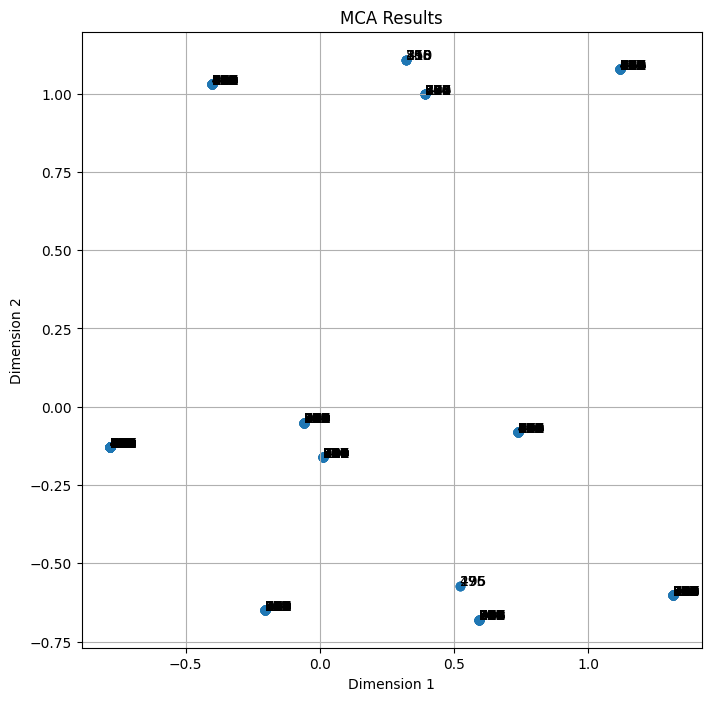

In [17]:
import matplotlib.pyplot as plt

# Plot MCA results
plt.figure(figsize=(8, 8))
plt.scatter(mca_coordinates.iloc[:, 0], mca_coordinates.iloc[:, 1])

# Annotate points with variable names
for i, txt in enumerate(titanic_mca_encoded.index):
    plt.annotate(txt, (mca_coordinates.iloc[i, 0], mca_coordinates.iloc[i, 1]))

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("MCA Results")
plt.grid(True)
plt.show()